In [3]:
import pandas as pd # Nos permite manejar data como dataframes
import numpy as np # Numpy es una librería de programación numérica super rápida
import matplotlib.pyplot as plt #sets up plotting under plt

In [5]:
SL = pd.read_csv('synergy_logistics_database.csv')
    print(SL)

In [165]:
cyw= ['direction', 'origin', 'destination', 'total_value']
group = SL[cyw].groupby( by= ['direction', 'origin', 'destination'])
group

In [2]:
group_rev=group['total_value'].sum()
(group_rev)

In [167]:
order = group_rev.sort_values(ascending=False)#.head()
order

direction  origin       destination   
Exports    China        Mexico            12250000000
           Canada       Mexico             8450000000
           South Korea  Vietnam            6877007000
           France       Belgium            5538069000
                        United Kingdom     5427000000
                                             ...     
           Netherlands  Argentina               36000
                        Mexico                  28000
           France       Russia                  20000
                        Netherlands             14000
                        Austria                  7000
Name: total_value, Length: 193, dtype: int64

In [168]:
#orderdf= order.to_frame()
#orderdf

In [169]:
half=len(order)//2
half

96

In [170]:
top= order.head(half)
top

direction  origin       destination   
Exports    China        Mexico            12250000000
           Canada       Mexico             8450000000
           South Korea  Vietnam            6877007000
           France       Belgium            5538069000
                        United Kingdom     5427000000
                                             ...     
           Spain        Germany             583000000
Imports    Germany      Poland              570000000
           Canada       USA                 569000000
Exports    Italy        Ireland             563000000
Imports    Germany      India               548000000
Name: total_value, Length: 96, dtype: int64

In [171]:
abc=top.sum()
abc

197383004000

In [172]:
total_rev = SL['total_value'].sum()
total_rev

215691298000

In [173]:
most_rev= total_rev*.80
most_rev

172553038400.0

In [176]:
eighty_half = most_rev - abc
eighty_half

-24829965600.0

In [177]:
type(order)

pandas.core.series.Series

In [178]:
for index, value in order.items():
    if value > 5427000000:
        print(f"Route: {index}, Revenue : {value}")

Route: ('Exports', 'China', 'Mexico'), Revenue : 12250000000
Route: ('Exports', 'Canada', 'Mexico'), Revenue : 8450000000
Route: ('Exports', 'South Korea', 'Vietnam'), Revenue : 6877007000
Route: ('Exports', 'France', 'Belgium'), Revenue : 5538069000


In [179]:
list_values = []
for index, value in order.items():
    list_values.append(value)
#print(list_values)

In [180]:
def sumlist(listaNumeros):
    counter = 0
    for index, value in order.items():
        counter = counter + value
    return counter

print(sumlist(list_values))

215691298000


In [181]:
def sumlist(listaNumeros):
    counter = 0
    for index, value in order.items():
        if counter < most_rev:
            counter = counter + value
    return counter

print(sumlist(list_values))

173049895000


In [182]:
routes= []
list_values1 = []
def sumlist(listaNumeros):
    counter = 0
    for index, value in order.items():
        if counter < most_rev:
            print(f"Route: {index}, Revenue: {value}")
            routes.append(index)
            list_values1.append(value)
            counter = counter + value 
    return counter

print('Total Revenue For This Routes:','$', sumlist(list_values), '// (Equivalent to 80%_Total_Revenue)')
print('Total of Routes: ',len(routes))
print('% of Total_Routes: ',((len(routes)/len(order))*100),'%')

Route: ('Exports', 'China', 'Mexico'), Revenue: 12250000000
Route: ('Exports', 'Canada', 'Mexico'), Revenue: 8450000000
Route: ('Exports', 'South Korea', 'Vietnam'), Revenue: 6877007000
Route: ('Exports', 'France', 'Belgium'), Revenue: 5538069000
Route: ('Exports', 'France', 'United Kingdom'), Revenue: 5427000000
Route: ('Exports', 'China', 'South Korea'), Revenue: 4790000000
Route: ('Exports', 'USA', 'Mexico'), Revenue: 4710000000
Route: ('Exports', 'South Korea', 'Japan'), Revenue: 4594000000
Route: ('Exports', 'Germany', 'Italy'), Revenue: 4541000000
Route: ('Exports', 'China', 'Germany'), Revenue: 4090000000
Route: ('Imports', 'Singapore', 'Thailand'), Revenue: 4017000000
Route: ('Imports', 'Japan', 'Mexico'), Revenue: 3918000000
Route: ('Imports', 'China', 'Thailand'), Revenue: 3831000000
Route: ('Exports', 'China', 'USA'), Revenue: 3797000000
Route: ('Exports', 'Russia', 'Belorussia'), Revenue: 3529000000
Route: ('Imports', 'Malaysia', 'Thailand'), Revenue: 3482000000
Route: ('Ex

In [183]:
df = pd.DataFrame(list(zip( routes,list_values1)), 
               columns =['Route', 'Total_Revenue' ]) 
df 

,Route,Total_Revenue
0,"(Exports, China, Mexico)",12250000000
1,"(Exports, Canada, Mexico)",8450000000
2,"(Exports, South Korea, Vietnam)",6877007000
3,"(Exports, France, Belgium)",5538069000
4,"(Exports, France, United Kingdom)",5427000000
...,...,...
57,"(Imports, USA, India)",1133000000
58,"(Exports, Spain, Russia)",1085000000
59,"(Exports, India, United Arab Emirates)",1037000000
60,"(Exports, USA, Netherlands)",1032187000


<Figure size 432x288 with 0 Axes>

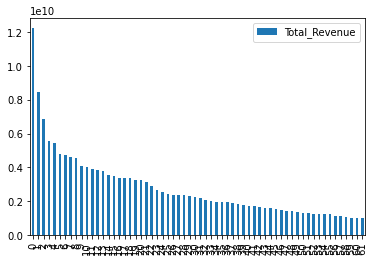

In [186]:
plt.figure();
df.plot(kind='bar');